En este experimento correremos kNN+PCA en el rango de alphas que queramos para ver y graficar la accuracy y performance de cada uno de ellos.
En nuestro caso corrimos este experimento con un el rango de alphas 1 a 50 y k fijo en 3.
Primero corremos un script para el build de las librerias de c++ como modulos de python.


In [ ]:
!sh build.sh

Importamos librerias necesarias

In [72]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import time
from pathlib import Path
from utils import get_MNIST
import matplotlib.pyplot as plt

Obtenemos el dataset de mnist, partido en 4/5 de entrenamiento y 1/5 de validacion. El mismo esta shuffleado sobre si mismo.

In [ ]:
X_train, y_train, X_val, y_val = get_MNIST(0.8)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Seteamos la cantidad de alphas a testear (siempre comenzando de 1)

In [73]:
alphas_a_testear = 20
k = 3

Ejecutamos el loop con k para cada alpha, guardamos los resultados en accuracy_con_pca y performance

In [74]:
accuracy_con_pca = []
performance = []
for i in range(1, alphas_a_testear):
    start =  time.process_time()

    pca = metnum.PCA(i)
    pca.fit(X_train)
    X_train_PCA = pca.transform(X_train)

    X_val_PCA = pca.transform(X_val)

    clf_metnum = metnum.KNNClassifier(k)
    clf_metnum.fit(X_train_PCA, y_train)
    acc = accuracy_score(clf_metnum.predict(X_val_PCA), y_val)
    end = time.process_time()

    time_performance = end - start
    accuracy_con_pca.append(acc)
    performance.append(time_performance)

In [109]:
for i in range(1, alphas_a_testear):
    print("Alpha: {}. Accuracy: {}. Duration: {}".format(i, accuracy_con_pca[i], performance[i]))

Alpha: 1. Accuracy: 0.4045714285714286. Duration: 21.65724388700005
Alpha: 2. Accuracy: 0.4617142857142857. Duration: 24.56932407399995
Alpha: 3. Accuracy: 0.6057857142857143. Duration: 23.9939701159999
Alpha: 4. Accuracy: 0.7242142857142857. Duration: 24.70591352400004
Alpha: 5. Accuracy: 0.8172857142857143. Duration: 26.322279368000068
Alpha: 6. Accuracy: 0.863. Duration: 27.778695078000055
Alpha: 7. Accuracy: 0.8951428571428571. Duration: 26.62453929100002
Alpha: 8. Accuracy: 0.9120714285714285. Duration: 27.626000019999992
Alpha: 9. Accuracy: 0.9285714285714286. Duration: 28.750039748000063
Alpha: 10. Accuracy: 0.9362142857142857. Duration: 29.139908202000015
Alpha: 11. Accuracy: 0.9477857142857142. Duration: 28.698107477999997
Alpha: 12. Accuracy: 0.9547857142857142. Duration: 28.968766547999962
Alpha: 13. Accuracy: 0.959. Duration: 28.41820860100006
Alpha: 14. Accuracy: 0.9608571428571429. Duration: 30.502289246000146
Alpha: 15. Accuracy: 0.9657857142857142. Duration: 28.06751675

IndexError: list index out of range

In [ ]:
performance

Generamos un grafico mostrando el ratio accuracy/performance por cada alpha

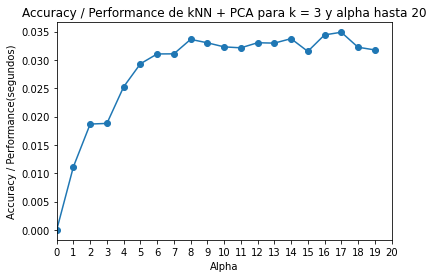

In [103]:
fn = np.insert(np.array(accuracy_con_pca) / np.array(performance), 0, 0)
plt.plot(fn, '-o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy / Performance(segundos)')
plt.xticks(range(alphas_a_testear+1))
plt.xlim(0)
plt.title(f'Accuracy / Performance de kNN + PCA para k = {k} y alpha hasta {alphas_a_testear}')
plt.show()

Generamos un grafico. Arriba, tenemos accuracy por cada alpha y abajo su performance.

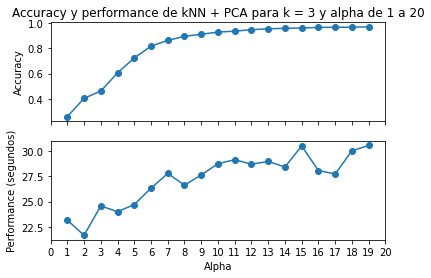

In [105]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(range(1, alphas_a_testear), accuracy_con_pca, '-o')
ax2.plot(range(1, alphas_a_testear), performance, '-o')
ax1.set_title(f'Accuracy y performance de kNN + PCA para k = {k} y alpha de 1 a {alphas_a_testear}')
ax2.set_xlabel('Alpha')
ax2.set_xticks(range(alphas_a_testear+1))
ax2.set_xlim(0)
ax2.set_ylabel('Performance (segundos)')
ax1.set_ylabel('Accuracy')
plt.show()